In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#задамо один стиль для графіків 

sns.set(style = "whitegrid",
    rc    = {'figure.figsize':(10,6)},
    palette = "pastel"
)

In [44]:
# Завдання 1: Прочитайте CSV файл

file_path = r"C:\Users\Asus\data\Global YouTube Statistics.csv"
df = pd.read_csv(file_path, encoding='latin-1')

In [45]:
# Завдання 2: Виведіть перші п'ять рядків
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [46]:
# Завдання 3: Виведіть розміри датасету
df.shape

(995, 28)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [48]:
#перейменуємо усі стовпці на стиль snake_case для зручності
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [49]:
# Завдання 4: Перевірте кількість пропусків у кожному зі стовпців
print("\nКількість пропусків у кожному зі стовпців:")
print(df.isna().sum())


Кількість пропусків у кожному зі стовпців:
rank                                         0
youtuber                                     0
subscribers                                  0
video_views                                  0
category                                    46
title                                        0
uploads                                      0
country                                    122
abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month   

In [50]:
# Завдання 5: Замініть комірки з пропущеними значеннями на середні за стовпцем
df.fillna(df.mean(), inplace=True)
df.isna().sum()

C:\Users\Asus\AppData\Local\Temp\ipykernel_2528\392644672.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


rank                                         0
youtuber                                     0
subscribers                                  0
video_views                                  0
category                                    46
title                                        0
uploads                                      0
country                                    122
abbreviation                               122
channel_type                                30
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                5
created_date 

Бачимо що не замінились на середнє значення текстові колонки

In [51]:
# Замініть тип даних на float

# Перетворюємо числові стовпці на тип float
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].astype(float)

In [52]:
# Завдання 6: Перевірте кількість пропусків ще раз
print("\nКількість пропусків після заміни:")
print(df.isna().sum())


Кількість пропусків після заміни:
rank                                         0
youtuber                                     0
subscribers                                  0
video_views                                  0
category                                    46
title                                        0
uploads                                      0
country                                    122
abbreviation                               122
channel_type                                30
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month            

In [53]:
#замінимо пропущені значення в текстових стовпцях на найбільш поширене значення

df['category'] = df['category'].fillna(df['category'].mode()[0])
df['created_month'] = df['created_month'].fillna(df['created_month'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['abbreviation'] = df['abbreviation'].fillna(df['abbreviation'].mode()[0])
df['channel_type'] = df['channel_type'].fillna(df['channel_type'].mode()[0])


#перевіримо знову суму пропущених значень в колонках
df.isna().sum()

rank                                       0
youtuber                                   0
subscribers                                0
video_views                                0
category                                   0
title                                      0
uploads                                    0
country                                    0
abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
gross_tert

In [54]:
df.channel_type.loc[:0]

0    Music
Name: channel_type, dtype: object

In [55]:
#Завдання 7: Перевірте, скільки унікальних країн представлено у колонці "Country"

df.country.unique()

array(['India', 'United States', 'Japan', 'Russia', 'South Korea',
       'United Kingdom', 'Canada', 'Brazil', 'Argentina', 'Chile', 'Cuba',
       'El Salvador', 'Pakistan', 'Philippines', 'Thailand', 'Colombia',
       'Barbados', 'Mexico', 'United Arab Emirates', 'Spain',
       'Saudi Arabia', 'Indonesia', 'Turkey', 'Venezuela', 'Kuwait',
       'Jordan', 'Netherlands', 'Singapore', 'Australia', 'Italy',
       'Germany', 'France', 'Sweden', 'Afghanistan', 'Ukraine', 'Latvia',
       'Switzerland', 'Vietnam', 'Malaysia', 'China', 'Iraq', 'Egypt',
       'Andorra', 'Ecuador', 'Morocco', 'Peru', 'Bangladesh', 'Finland',
       'Samoa'], dtype=object)

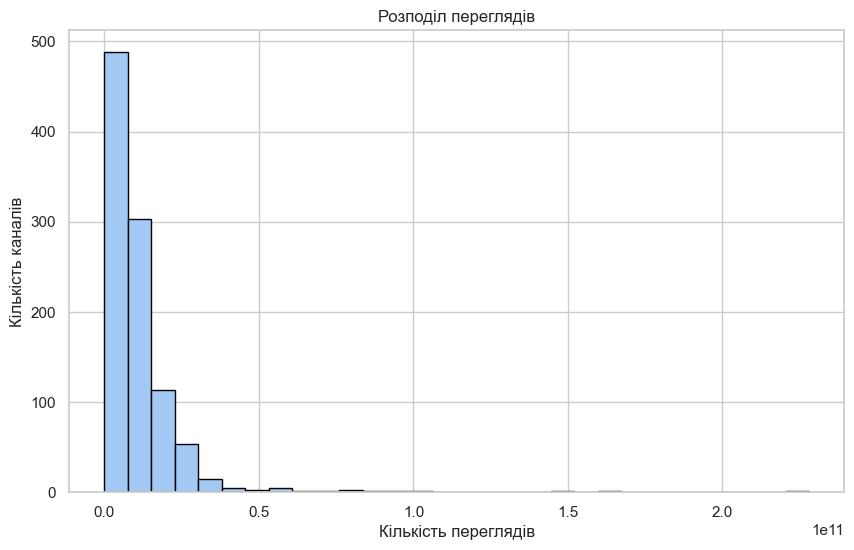

In [56]:
#завдання 8: Побудуйте діаграму розподілу переглядів (використовуйте kind='hist')

plt.figure(figsize=(10, 6))

df['video_views'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Розподіл переглядів')
plt.xlabel('Кількість переглядів')
plt.ylabel('Кількість каналів')
plt.show()


In [57]:
# Завдання 9:Визначте максимальну, мінімальну, середню кількість переглядів

max_views = df['video_views'].max()
print(f"Максимальна кількість переглядів: {max_views:.2f}")

min_views = df['video_views'].min()
print(f"Мінімальна кількість переглядів: {min_views:.2f}")

mean_views = df['video_views'].mean()
print(f"Середня кількість переглядів: {mean_views:.2f}")


Максимальна кількість переглядів: 228000000000.00
Мінімальна кількість переглядів: 0.00
Середня кількість переглядів: 11039537052.04


In [58]:
#Завдання 10: Знайдіть країну, де найбільше відео було завантажено на YouTube

display(df.loc[df['uploads'].idxmax()])

# Країна з найбільшою кількістю завантажень
country_with_most_uploads = df.loc[df['uploads'].idxmax()]['country']
print(f"Країна з найбільшою кількістю завантажень: {country_with_most_uploads}")

rank                                                 96.0
youtuber                                         ABP NEWS
subscribers                                    37000000.0
video_views                                 13102611515.0
category                                   People & Blogs
title                                            ABP NEWS
uploads                                          301308.0
country                                             India
abbreviation                                           IN
channel_type                                         News
video_views_rank                                    280.0
country_rank                                         25.0
channel_type_rank                                     2.0
video_views_for_the_last_30_days              267060000.0
lowest_monthly_earnings                           66800.0
highest_monthly_earnings                        1100000.0
lowest_yearly_earnings                           801200.0
highest_yearly

Країна з найбільшою кількістю завантажень: India


In [59]:
#Завдання 11: Знайдіть відео (виведіть його назву) з найбільшою та найменшою кількістю завантажень uploads. 

video_max_uploads = df.loc[df['uploads'].idxmax()]['title']
video_mix_uploads = df.loc[df['uploads'].idxmin()]['title']
print(f'Відео з найбільшою кількістю завантажень: {video_max_uploads}')
print(f'Відео з найменшою кількістю завантажень: {video_mix_uploads}')

Відео з найбільшою кількістю завантажень: ABP NEWS
Відео з найменшою кількістю завантажень: Music
